<a href="https://colab.research.google.com/github/Siddharth-Singh-Verma/final_year_research/blob/main/research_ATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Evaluation of ML Algorithms for Efficient Resume-Job Matching

## Abstract
Resume-job matching is a critical task in recruitment, enabling organizations to efficiently identify candidates whose skills align with job requirements. This project explores the effectiveness of different approaches to resume-job matching, transitioning from **rule-based methods** to **machine learning (ML), deep learning, and generative AI**. By analyzing the performance of these techniques, we aim to determine the most efficient approach for improving automated hiring processes. The study begins with rule-based matching, progresses to ML algorithms, incorporates deep learning techniques, and finally investigates the potential of generative AI for enhancing job-resume matching accuracy.


## Dataset Analysis

### Why Are We Analyzing the Dataset?
Before implementing any matching techniques, it is crucial to understand the structure and quality of the data. This step ensures that our dataset is suitable for both rule-based and machine learning approaches. Specifically, we will:

- Explore the dataset to check for missing values, inconsistencies, and variations.
- Analyze job titles to find common and unique roles in both datasets.
- Ensure logical correctness before merging resumes with job descriptions.

To implement the **rule-based approach**, we created a **merged dataset** by combining resumes with corresponding job descriptions. This dataset allowed us to test basic keyword matching techniques for resume-job matching. Moving forward, we will explore machine learning-based methods for improved accuracy and scalability.





In [5]:
import pandas as pd


resume_df = pd.read_csv("/content/drive/MyDrive/finalyearproject/UpdatedResumeDataSet.csv")
job_desc_df = pd.read_csv("/content/drive/MyDrive/finalyearproject/data.csv")


print("Resume Dataset Info:")
resume_df.info()
print("\nJob Description Dataset Info:")
job_desc_df.info()

# Display first few rows
resume_df.head(), job_desc_df.head()


Resume Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1262 non-null   object
 1   Resume    1262 non-null   object
dtypes: object(2)
memory usage: 19.8+ KB

Job Description Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       157 non-null    int64 
 1   company          157 non-null    object
 2   position         157 non-null    object
 3   url              157 non-null    object
 4   location         157 non-null    object
 5   headquaters      157 non-null    object
 6   employees        154 non-null    object
 7   founded          154 non-null    object
 8   industry         154 non-null    object
 9   Job Description  157 non-null    object
dtyp

(       Category                                             Resume
 0  Data Science  Skills * Programming Languages: Python (pandas...
 1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
 2  Data Science  Areas of Interest Deep Learning, Control Syste...
 3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
 4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...,
    Unnamed: 0                          company  \
 0           1          Visual BI Solutions Inc   
 1           2                       Jobvertise   
 2           3           Santander Consumer USA   
 3           4   Federal Reserve Bank of Dallas   
 4           5                           Aviall   
 
                                             position  \
 0  Graduate Intern (Summer 2017) - SAP BI / Big D...   
 1                          Digital Marketing Manager   
 2    Manager, Pricing Management Information Systems   
 3               Treasury Services Analyst Internship  

  

### 📌 1. Two datasets are being loaded:  
- **`resume_df`**: Contains resumes categorized by job field.  
- **`job_desc_df`**: Contains job descriptions along with company details.  

### 📌 2. Resume Dataset Structure:  
- **1262 resumes** available.  
- Contains **two columns**:  
  - `"Category"` (Job Title/Field)  
  - `"Resume"` (Resume text)  
- ✅ **No missing values**.  

### 📌 3. Job Description Dataset Structure:  
- **157 job descriptions** available.  
- Contains **10 columns**, including:  
  - `"company"`: Hiring company name.  
  - `"position"`: Job title.  
  - `"location"`, `"headquarters"`, `"employees"`: Company info.  
  - `"industry"`: Field of work.  
  - `"Job Description"`: The actual job posting text.  
- ⚠️ `"employees"` and `"founded"` **have missing values**.  

### 📌 4. Resume dataset is significantly larger than job description dataset:  
- **1262 resumes vs. 157 job descriptions** → **Need careful merging** to retain data.  




In [6]:
# Rename columns in both datasets
resume_df.rename(columns={"Category": "Job Title"}, inplace=True)
job_desc_df.rename(columns={"position": "Job Title"}, inplace=True)

# Keep only relevant columns in job_desc_df
job_desc_df = job_desc_df[["Job Title", "Job Description"]]

# Display the updated dataframes
resume_df.head(), job_desc_df.head()


(      Job Title                                             Resume
 0  Data Science  Skills * Programming Languages: Python (pandas...
 1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
 2  Data Science  Areas of Interest Deep Learning, Control Syste...
 3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
 4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...,
                                            Job Title  \
 0  Graduate Intern (Summer 2017) - SAP BI / Big D...   
 1                          Digital Marketing Manager   
 2    Manager, Pricing Management Information Systems   
 3               Treasury Services Analyst Internship   
 4                              Intern, Sales Analyst   
 
                                      Job Description  
 0   Location: Plano, TX or Oklahoma City, OK Dura...  
 1   The Digital Marketing Manager is the front li...  
 2   Summary of Responsibilities:The Manager Prici...  
 3   ORGANIZATIONAL SUM

In [7]:
# Get unique job titles from both datasets
resume_job_titles = set(resume_df["Job Title"].unique())
job_desc_job_titles = set(job_desc_df["Job Title"].unique())

# Find matching job titles
matching_titles = resume_job_titles.intersection(job_desc_job_titles)

# Count of matching and non-matching job titles
num_matching = len(matching_titles)
num_resume_titles = len(resume_job_titles)
num_job_desc_titles = len(job_desc_job_titles)

print(f"Total unique job titles in resume dataset: {num_resume_titles}")
print(f"Total unique job titles in job description dataset: {num_job_desc_titles}")
print(f"Number of matching job titles: {num_matching}")
print(f"Matching Job Titles: {matching_titles}")

# Find job titles that are in resumes but not in job descriptions
non_matching_titles = resume_job_titles - job_desc_job_titles
print(f"\nJob Titles in resumes but NOT in job descriptions: {non_matching_titles}")


Total unique job titles in resume dataset: 35
Total unique job titles in job description dataset: 110
Number of matching job titles: 1
Matching Job Titles: {'Business Analyst'}

Job Titles in resumes but NOT in job descriptions: {'ETL Developer', 'DotNet Developer', 'SAP Developer', 'PMO', 'Hadoop', 'Health and fitness', 'Web Designing', 'HR', 'UI/UX Designer', 'Automation Testing', 'Data Science', 'Game Developer', 'DevOps Engineer', 'Blockchain', 'Operations Manager', 'Cybersecurity Analyst', 'Arts', 'Database', 'Mechanical Engineer', 'Energy Analyst', 'AI Specialist', 'Python Developer', 'Java Developer', 'Electrical Engineering', 'Digital Marketing', 'Robotics Engineer', 'Sales', 'VR/AR Developer', 'Advocate', 'Product Manager', 'Civil Engineer', 'Network Security Engineer', 'Cloud Architect', 'Testing'}


In [8]:
# Get unique job titles from both datasets
resume_job_titles = set(resume_df["Job Title"].unique())
job_desc_job_titles = set(job_desc_df["Job Title"].unique())

# Print unique job titles in resume dataset
print("Unique Job Titles in Resume Dataset:")
print(resume_job_titles)

print("\nUnique Job Titles in Job Description Dataset:")
print(job_desc_job_titles)


Unique Job Titles in Resume Dataset:
{'ETL Developer', 'DotNet Developer', 'SAP Developer', 'PMO', 'Hadoop', 'Health and fitness', 'Web Designing', 'HR', 'UI/UX Designer', 'Automation Testing', 'Data Science', 'Game Developer', 'DevOps Engineer', 'Blockchain', 'Operations Manager', 'Cybersecurity Analyst', 'Arts', 'Database', 'Mechanical Engineer', 'Energy Analyst', 'AI Specialist', 'Python Developer', 'Business Analyst', 'Java Developer', 'Electrical Engineering', 'Digital Marketing', 'Robotics Engineer', 'Sales', 'VR/AR Developer', 'Advocate', 'Product Manager', 'Civil Engineer', 'Network Security Engineer', 'Cloud Architect', 'Testing'}

Unique Job Titles in Job Description Dataset:
{'Digital Marketing Manager', 'Data/Systems Business Analyst Intern', 'Summer Associate - Strategy & Operations, MBA Degree, Consulting - University of Minnesota', 'Intern, Product Management', 'Associate Intern - Information Technology', 'Sales Support (Internship)', 'Summer Internship - RPS Product Man

 **Mapped Job Titles: Resume Dataset vs. Job Description Dataset**

| **Resume Dataset Job Title**      | **Job Description Dataset Job Title(s)** |
|-----------------------------------|--------------------------------------|
| **Data Science**                  | Data Scientist Intern, Data Science / Software Engineering Intern, Intern - Data Scientist |
| **Digital Marketing**              | Digital Marketing Intern, Digital Marketing Manager, Performance and Programmatic Marketing Summer Intern, Digital Marketing Coordinator (Intern) |
| **Business Analyst**               | Business Analyst Intern, Business Risk Services Intern - Summer, HPS Business Analyst I, Summer Scholar, Business Analyst - Human Capital |
| **DevOps Engineer**                | Intern - Mainframe Engineering, Applications Support Team Intern |
| **Product Manager**                | Intern, Product Management, Director of Product Management – Travel Agent Functionality |
| **Cybersecurity Analyst**          | N/A (No direct match, but could relate to IT/Tech internships) |
| **UI/UX Designer**                 | User Interaction Design Intern |
| **Java Developer**                 | N/A (No exact match) |
| **Electrical Engineering**         | Electrical Engineer Internship |
| **Operations Manager**             | Intern, Operations |
| **Research & Development**         | Intern, Research & Development |
| **Accounting**                     | INTERN, Accounting, Intern, Accounting & Analysis |
| **Sales**                          | Intern, Sales, Intern, Sales Analyst |
| **HR (Human Resources)**           | Human Resources Intern, Senior Corporate Recruiter - Information Technology, Human Resources Analyst Internship |
| **Risk Analyst**                   | Pricing Analyst Intern, Structured Finance Intern |
| **Finance**                        | Financial Planning and Analysis Intern, Treasury Services Analyst Internship |
| **Marketing**                      | Intern, Marketing Analysis, INTERN, Marketing |
| **Cloud Architect**                | N/A (No direct match, but related to IT roles) |
| **Database**                       | Business Intelligence/SQL Developer, Data Engineer Intern |
| **Data Analyst**                   | Data Analyst Intern - The University of Texas at Austin, Deloitte Corporate Finance Data Analyst Intern - Dallas, Data Conversion Specialist Intern |
| **AI Specialist**                  | Data Science / Software Engineering Intern, Intern - Data Scientist |
| **Mechanical Engineer**            | Water Engineer Intern (some relevance, but no exact match) |
| **Robotics Engineer**              | N/A (No direct match) |
| **ETL Developer**                  | Data Engineer Intern, Data Conversion Specialist Intern |
| **Python Developer**               | Data Science / Software Engineering Intern, Intern - Data Scientist |
| **Cloud Architect**                | N/A (No exact match) |

 **Observations**
- Some job titles from the **Resume Dataset**, such as **Blockchain, VR/AR Developer, Advocate, Civil Engineer, Network Security Engineer, and Energy Analyst**, do not have direct matches in the **Job Description Dataset**.
- Roles like **Cybersecurity Analyst** and **Cloud Architect** have relevant but not exact matches.
- There are broader titles in the **Job Description Dataset**, which might require some flexibility in matching.

Would you like to refine the matches further or create a merging strategy based on these mappings? 🚀


In [10]:
import random
# Manual Job Title Mapping (Resume Dataset -> Job Description Dataset)
job_title_mapping = {
    "Data Science": ["Data Scientist Intern", "Data Science / Software Engineering Intern", "Intern - Data Scientist"],
    "Digital Marketing": ["Digital Marketing Intern", "Digital Marketing Manager", "Performance and Programmatic Marketing Summer Intern"],
    "Business Analyst": ["Business Analyst Intern", "Business Risk Services Intern - Summer", "HPS Business Analyst I"],
    "DevOps Engineer": ["Intern - Mainframe Engineering", "Applications Support Team Intern"],
    "Product Manager": ["Intern, Product Management", "Director of Product Management – Travel Agent Functionality"],
    "Cybersecurity Analyst": [],  # No direct match
    "UI/UX Designer": ["User Interaction Design Intern"],
    "Java Developer": [],  # No direct match
    "Electrical Engineering": ["Electrical Engineer Internship"],
    "Operations Manager": ["Intern, Operations"],
    "Research & Development": ["Intern, Research & Development"],
    "Accounting": ["INTERN, Accounting", "Intern, Accounting & Analysis"],
    "Sales": ["Intern, Sales", "Intern, Sales Analyst"],
    "HR": ["Human Resources Intern", "Senior Corporate Recruiter - Information Technology"],
    "Risk Analyst": ["Pricing Analyst Intern", "Structured Finance Intern"],
    "Finance": ["Financial Planning and Analysis Intern", "Treasury Services Analyst Internship"],
    "Marketing": ["Intern, Marketing Analysis", "INTERN, Marketing"],
    "Database": ["Business Intelligence/SQL Developer", "Data Engineer Intern"],
    "Data Analyst": ["Data Analyst Intern - The University of Texas at Austin", "Deloitte Corporate Finance Data Analyst Intern - Dallas"],
    "AI Specialist": ["Data Science / Software Engineering Intern", "Intern - Data Scientist"],
    "Mechanical Engineer": ["Water Engineer Intern"],
    "ETL Developer": ["Data Engineer Intern", "Data Conversion Specialist Intern"],
    "Python Developer": ["Data Science / Software Engineering Intern", "Intern - Data Scientist"],
}

# Create the new dataset
new_data = []

for _, row in resume_df.iterrows():
    job_title = row["Job Title"]
    resume = row["Resume"]

    if job_title in job_title_mapping and job_title_mapping[job_title]:  # Check if mapping exists
        matched_jobs = job_title_mapping[job_title]

        # Get job descriptions from job_desc_df
        possible_descriptions = job_desc_df[job_desc_df["Job Title"].isin(matched_jobs)]["Job Description"].tolist()

        if possible_descriptions:
            job_description = random.choice(possible_descriptions)  # Randomly pick one
            new_data.append([job_title, resume, job_description])

# Create new DataFrame
new_df = pd.DataFrame(new_data, columns=["Job Title", "Resume", "Job Description"])

# Save to CSV
new_df.to_csv("/content/drive/MyDrive/finalyearproject/merged_dataset.csv", index=False)

# Display first few rows
new_df.head()

,Job Title,Resume,Job Description
0,Data Science,Skills * Programming Languages: Python (pandas...,University Programs: Engineering Intern Rayth...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Real-world Experience. Life-long Connections....
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Atos is a leader in digital services with an...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Atos is a leader in digital services with an...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Job Details Intern - Data Scientist US - TEXA...


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        558 non-null    object
 1   Resume           558 non-null    object
 2   Job Description  558 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


##  1 Rule-Based Approach: Basic Keyword Matching  

## Overview  
In this approach, we implement a simple rule-based matching system to compare resumes and job descriptions. The goal is to determine the relevance of a resume for a given job description based on shared keywords.  

## Methodology  
- Extract key terms from both resumes and job descriptions.  
- Count the number of overlapping words to assess similarity.  
- Normalize scores to compare different resumes fairly.  

## Advantages  
- Easy to implement and interpret.  
- No need for training data.  

## Limitations  
- Ignores word context and synonyms.  
- Can be affected by keyword stuffing.  


In [12]:
import pandas as pd
from collections import Counter

# Function to perform keyword matching
def keyword_matching(resume, job_description):
    if pd.isna(resume) or pd.isna(job_description):
        return 0  # No match if any is empty

    resume_words = set(resume.lower().split())
    job_desc_words = set(job_description.lower().split())

    common_words = resume_words.intersection(job_desc_words)

    return len(common_words) / max(len(job_desc_words), 1)  # Normalize by job description length

# Load dataset
new_df = pd.read_csv("/content/drive/MyDrive/finalyearproject/merged_dataset.csv")  # Update with actual path

# Apply keyword matching
new_df["Match Score"] = new_df.apply(lambda row: keyword_matching(row["Resume"], row["Job Description"]), axis=1)

# Display results
print(new_df.head())


      Job Title                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                     Job Description  Match Score  
0   University Programs: Engineering Intern Rayth...     0.227679  
1   Real-world Experience. Life-long Connections....     0.121951  
2    Atos is a leader in digital services with an...     0.119403  
3    Atos is a leader in digital services with an...     0.228856  
4   Job Details Intern - Data Scientist US - TEXA...     0.025974  


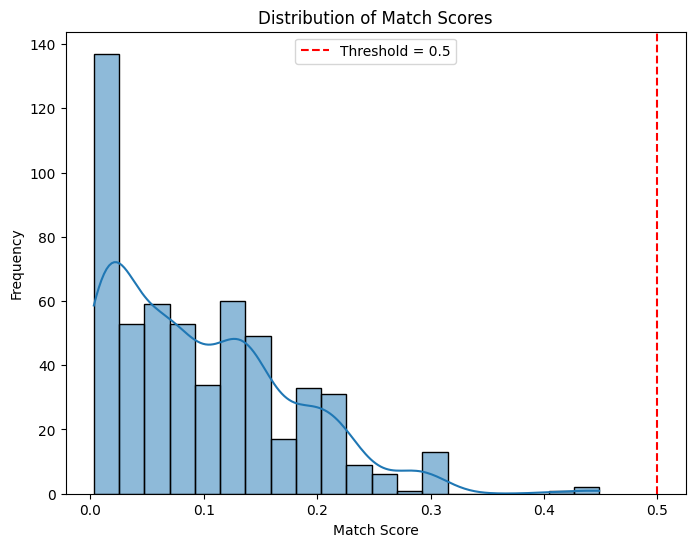

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, auc

# Define a threshold for classification (e.g., 0.5 means matches above 0.5 are considered positive)
threshold = 0.5

# Generate binary labels based on threshold
new_df["Predicted Match"] = (new_df["Match Score"] >= threshold).astype(int)

# Assume we have ground truth labels (1 for a correct match, 0 for incorrect)
# Replace 'Ground Truth' with actual column if available
if "Ground Truth" in new_df.columns:
    precision, recall, _ = precision_recall_curve(new_df["Ground Truth"], new_df["Match Score"])
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'PR AUC: {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Plot distribution of match scores
plt.figure(figsize=(8, 6))
sns.histplot(new_df["Match Score"], bins=20, kde=True)
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel("Match Score")
plt.ylabel("Frequency")
plt.title("Distribution of Match Scores")
plt.legend()
plt.show()


### Findings from Match Score Distribution

- **Most Scores Are Low:** The majority of match scores are close to **0.0**, indicating minimal keyword overlap between resumes and job descriptions.
- **Few High Scores:** Only a small number of resume-job pairs have a high match score, suggesting that keyword matching alone may not capture strong similarities.
- **Threshold Consideration:** The red dashed line at **0.5** represents a potential threshold for a good match, but very few resumes reach this level.
- **Skewed Distribution:** The distribution is **right-skewed**, meaning most matches are weak, with only a few strong matches.

### Implications:
- **Keyword matching alone is likely insufficient** for effective resume-job matching.
- **Lowering the threshold** might increase the number of accepted matches, but this could also reduce precision.



## Approach 2: Machine Learning-Based Matching

### Why Machine Learning?
Rule-based approaches rely heavily on exact keyword matches and predefined heuristics, which may not generalize well to varied resumes and job descriptions. Machine learning, on the other hand, can learn patterns from data and generalize better to unseen resumes.

### Why Use the Resume-Only Dataset?
The resume-only dataset provides a much larger number of job titles, allowing for better generalization in our machine learning model. Since our goal is to classify resumes into job titles, this dataset is more suitable than the merged dataset, which was limited in scope and contained only exact matches.



#### Pre-Preprocessing daset for ml

In [43]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download necessary resources
nltk.download("stopwords")
nltk.download("wordnet")

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/finalyearproject/UpdatedResumeDataSet.csv")
df.rename(columns={"Category": "Job Title"}, inplace=True)

# Initialize preprocessing tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Convert job titles to lowercase for consistency
df["Job Title"] = df["Job Title"].str.lower()
job_titles = set(df["Job Title"].unique())

def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()  # Convert to lowercase

    # Remove exact job titles from resume text
    for title in job_titles:
        text = re.sub(r"\b" + re.escape(title) + r"\b", "", text)

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenization & stopword removal
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)

# Apply text preprocessing
df["Cleaned_Resume"] = df["Resume"].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(df["Cleaned_Resume"])

# Convert job titles to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Job Title"])  # Convert job titles to numbers

# Save processed data
processed_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
processed_df["Job Title"] = y  # Store numeric job titles
processed_df.to_csv("/content/drive/MyDrive/finalyearproject/processed_resume_dataset.csv", index=False)

print("✅ Preprocessing complete! Processed dataset saved.")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Preprocessing complete! Processed dataset saved.


### Training a Machine Learning Models for Resume Classification


In [60]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
processed_df = pd.read_csv("/content/drive/MyDrive/finalyearproject/processed_resume_dataset.csv")

# Split features and labels
X = processed_df.drop(columns=["Job Title"])
y = processed_df["Job Title"]  # Already numeric

# Train-test split (Stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Save test data for later use
joblib.dump(X_test, "/content/drive/MyDrive/finalyearproject/models/X_test.pkl")
joblib.dump(y_test, "/content/drive/MyDrive/finalyearproject/models/y_test.pkl")

print("✅ Test data saved successfully!")



✅ Test data saved successfully!


In [45]:
# Logistic Regression model with class balancing
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")

# Hyperparameter tuning using GridSearchCV
param_grid = {"C": [0.01, 0.1, 1, 10], "max_iter": [500, 1000, 1500]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model
best_log_reg = grid_search.best_estimator_

# Predictions
y_pred_log_reg = best_log_reg.predict(X_test)

# Evaluation
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7944664031620553
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.18      0.33      0.24         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         6
           8       0.18      0.33      0.24         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       0.00      0.00      0.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       0.00      0.00      0.0

In [55]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8063241106719368
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      0.50      0.50         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         6
           8       0.29      0.33      0.31         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       0.40      0.33      0.36         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       0.00      0.00      0.00         6


In [47]:
from sklearn.svm import SVC

# Support Vector Machine model
svm_model = SVC(kernel='linear', class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions for SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluation for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7865612648221344
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.10      0.17      0.12         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         6
           8       0.10      0.17      0.12         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       0.00      0.00      0.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       0.00      0.00      0.00         6
          16       1

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt_model.fit(X_train, y_train)

# Predictions for Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluation for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8023715415019763
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.33      0.50      0.40         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.09      0.17      0.12         6
           8       0.29      0.33      0.31         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       0.17      0.17      0.17         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       0.25      0.17      0.20         6


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluation for Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7944664031620553
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.38      0.50      0.43         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         6
           8       0.17      0.17      0.17         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       0.00      0.00      0.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       0.29      0.33      0.31   

In [50]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation for XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7984189723320159
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.29      0.33      0.31         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         6
           8       0.29      0.33      0.31         6
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       0.14      0.17      0.15         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       0.25      0.33      0.29         6
          16

In [62]:
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load preprocessed dataset
processed_df = pd.read_csv("/content/drive/MyDrive/finalyearproject/processed_resume_dataset.csv")

# Split features and labels
X = processed_df.drop(columns=["Job Title"])
y = processed_df["Job Title"]

# Train-test split (Stratified to maintain class distribution)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# Train and save models
for model_name, model in models.items():
    print(f"🚀 Training {model_name}...")
    model.fit(X_train, y_train)  # Train model
    joblib.dump(model, f"/content/drive/MyDrive/finalyearproject/models/{model_name.replace(' ', '_').lower()}.pkl")

# Save test data for evaluation
joblib.dump(X_test, "/content/drive/MyDrive/finalyearproject/models/X_test.pkl")
joblib.dump(y_test, "/content/drive/MyDrive/finalyearproject/models/y_test.pkl")

print("✅ All models trained and saved successfully!")


🚀 Training Random Forest...
🚀 Training Logistic Regression...
🚀 Training Support Vector Machine...
🚀 Training Decision Tree...
🚀 Training Gradient Boosting...
🚀 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ All models trained and saved successfully!


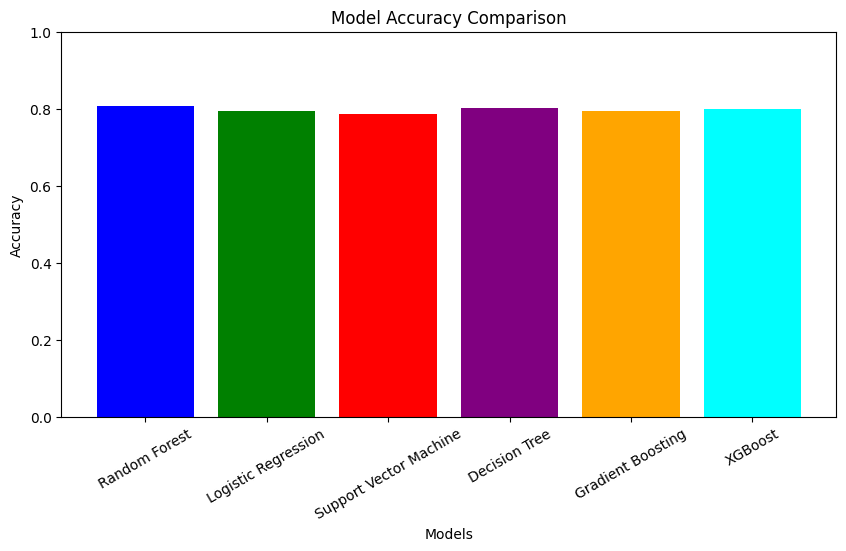

In [66]:
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score, classification_report

# List of model names and their file paths
model_paths = {
    "Random Forest": "/content/drive/MyDrive/finalyearproject/models/random_forest.pkl",
    "Logistic Regression": "/content/drive/MyDrive/finalyearproject/models/logistic_regression.pkl",
    "Support Vector Machine": "/content/drive/MyDrive/finalyearproject/models/support_vector_machine.pkl",
    "Decision Tree": "/content/drive/MyDrive/finalyearproject/models/decision_tree.pkl",
    "Gradient Boosting": "/content/drive/MyDrive/finalyearproject/models/gradient_boosting.pkl",
    "XGBoost": "/content/drive/MyDrive/finalyearproject/models/xgboost.pkl"
}

# Load test data
X_test = joblib.load("/content/drive/MyDrive/finalyearproject/models/X_test.pkl")
y_test = joblib.load("/content/drive/MyDrive/finalyearproject/models/y_test.pkl")

# Initialize dictionaries for predictions and accuracy
predictions = {}
accuracy_scores = {}

# Load each model, make predictions, and compute accuracy
for model_name, model_path in model_paths.items():
    try:
        model = joblib.load(model_path)  # Load model
        y_pred = model.predict(X_test)   # Make predictions
        predictions[model_name] = y_pred
        accuracy_scores[model_name] = accuracy_score(y_test, y_pred)  # Compute accuracy
    except FileNotFoundError:
        print(f"⚠️ Warning: {model_name} model not found. Skipping.")
    except Exception as e:
        print(f"❌ Error loading {model_name}: {e}")

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()

# Print Classification Reports
#for model_name, y_pred in predictions.items():
    #print(f"🔹 {model_name} Classification Report:\n", classification_report(y_test, y_pred))




In [ ]:
import gradio as gr
import joblib
import numpy as np
import fitz  # PyMuPDF for PDF reading
from sklearn.feature_extraction.text import TfidfVectorizer

# Load models and preprocessing tools
models = {
    "Logistic Regression": joblib.load("/content/drive/MyDrive/finalyearproject/models/logistic_regression_model.pkl"),
    "Random Forest": joblib.load("/content/drive/MyDrive/finalyearproject/models/random_forest_model.pkl"),
    "Support Vector Machine": joblib.load("/content/drive/MyDrive/finalyearproject/models/svm_model.pkl"),
    "Decision Tree": joblib.load("/content/drive/MyDrive/finalyearproject/models/decision_tree_model.pkl"),
    "Gradient Boosting": joblib.load("/content/drive/MyDrive/finalyearproject/models/gradient_boosting_model.pkl"),
    "XGBoost": joblib.load("/content/drive/MyDrive/finalyearproject/models/xgboost_model.pkl"),
}

# Load TF-IDF vectorizer and label encoder
vectorizer = joblib.load("/content/drive/MyDrive/finalyearproject/models/tfidf_vectorizer.pkl")
label_encoder = joblib.load("/content/drive/MyDrive/finalyearproject/models/label_encoder.pkl")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = "\n".join([page.get_text() for page in doc])
    return text.strip()

# Function to predict job title
def predict_job_title(model_name, resume_text, resume_file):
    # Load selected model
    model = models[model_name]

    # Handle both text input and PDF upload
    if resume_file is not None:
        resume_text = extract_text_from_pdf(resume_file.name)
    if not resume_text.strip():
        return "Error: No resume content provided.", 0.0

    # Transform text using the vectorizer
    resume_vector = vectorizer.transform([resume_text])

    # Predict and get probability score
    predicted_label = model.predict(resume_vector)[0]
    confidence_score = np.max(model.predict_proba(resume_vector))  # Get highest probability

    # Convert numeric label back to job title
    predicted_job_title = label_encoder.inverse_transform([predicted_label])[0]

    return predicted_job_title, round(confidence_score, 2)

# Create Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# Resume Job Title Predictor 🎯")
    gr.Markdown("Upload a **PDF Resume** or paste the text, select a model, and get predictions!")

    model_dropdown = gr.Dropdown(choices=list(models.keys()), label="Select Model")
    resume_textbox = gr.Textbox(label="Paste Resume Text Here (or upload a PDF)")
    resume_file = gr.File(label="Upload Resume PDF (Optional)")
    predict_button = gr.Button("Predict Job Title")
    output_label = gr.Textbox(label="Predicted Job Title", interactive=False)
    output_score = gr.Textbox(label="Confidence Score", interactive=False)

    predict_button.click(predict_job_title, inputs=[model_dropdown, resume_textbox, resume_file], outputs=[output_label, output_score])

# Launch the app
demo.launch(debug=True, share=True)
